# Simulation Design 1

CODIGOS : 
Katiuska Olivera Quevedo (20172533) <br/> 
Rosemery Fernandez Sanchez (20172635) <br/> 
Aliro Cabrera Florez (20152034) <br/> 
Jose Uscamayta Quispe (20195674) <br/> 

## B=50

In [7]:
library(hdm)

set.seed(1)
B= 50 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=10000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y = 5*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

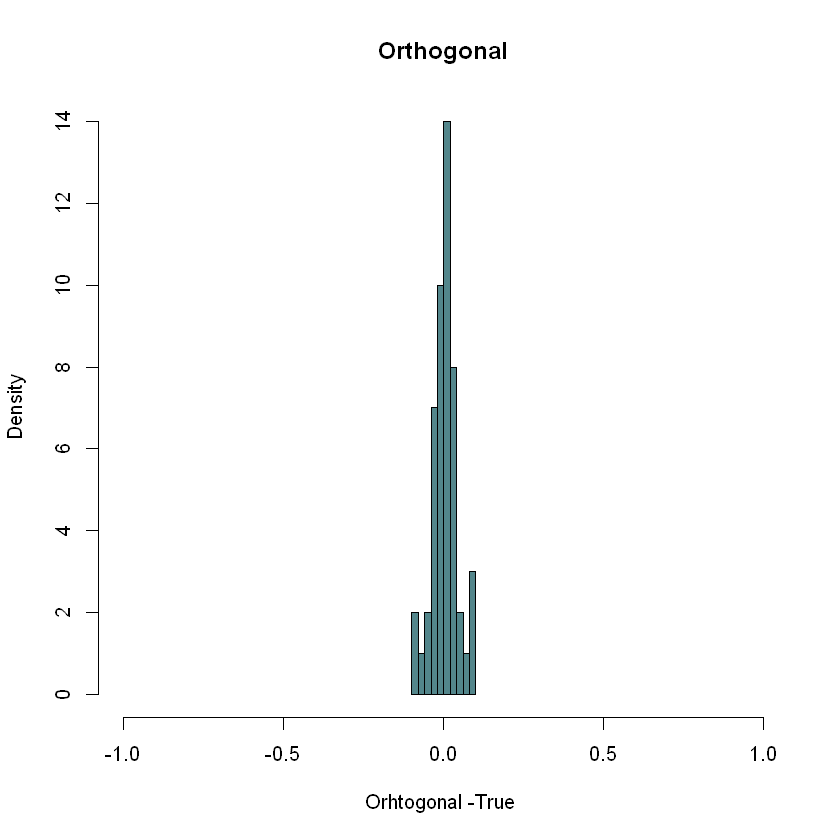

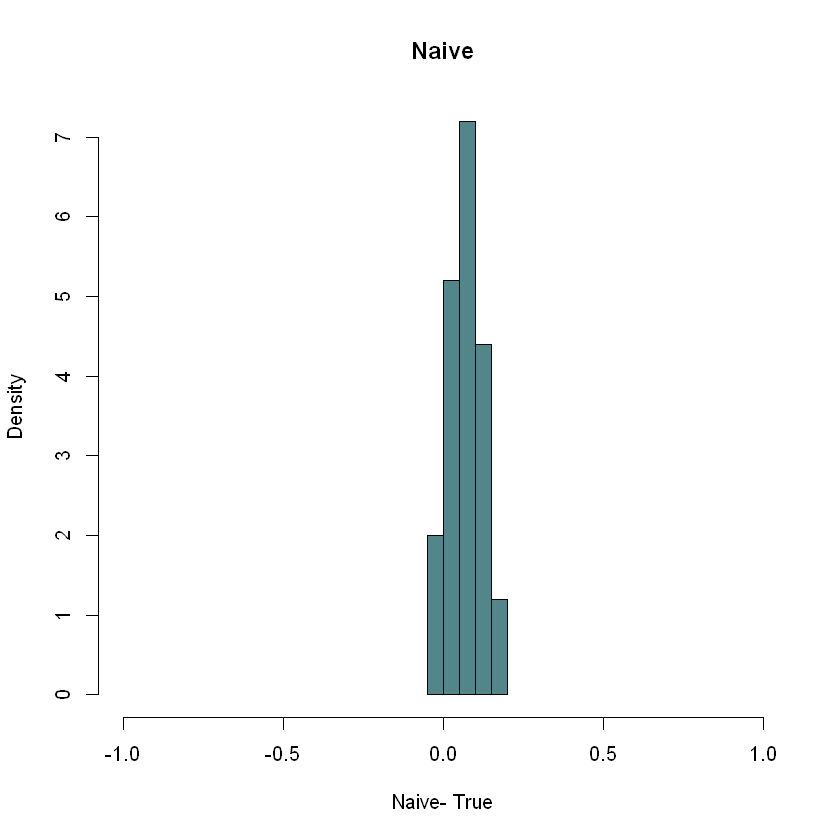

In [17]:
hist(Orthogonal-5,col="cadetblue4", freq=F, xlim= c(-1, 1), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-5, col="cadetblue4", freq=F, xlim= c(-1,1), xlab= "Naive- True", main = "Naive")


## B=100

In [18]:
library(hdm)

set.seed(1)
B= 100 # trials 
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y =  Y = 5*D + X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}


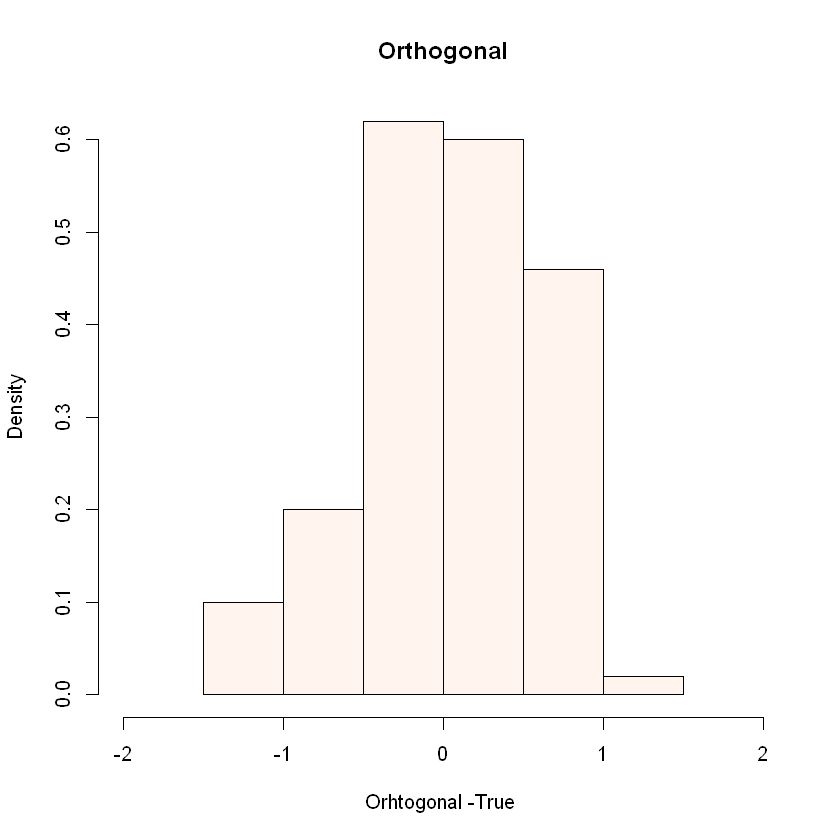

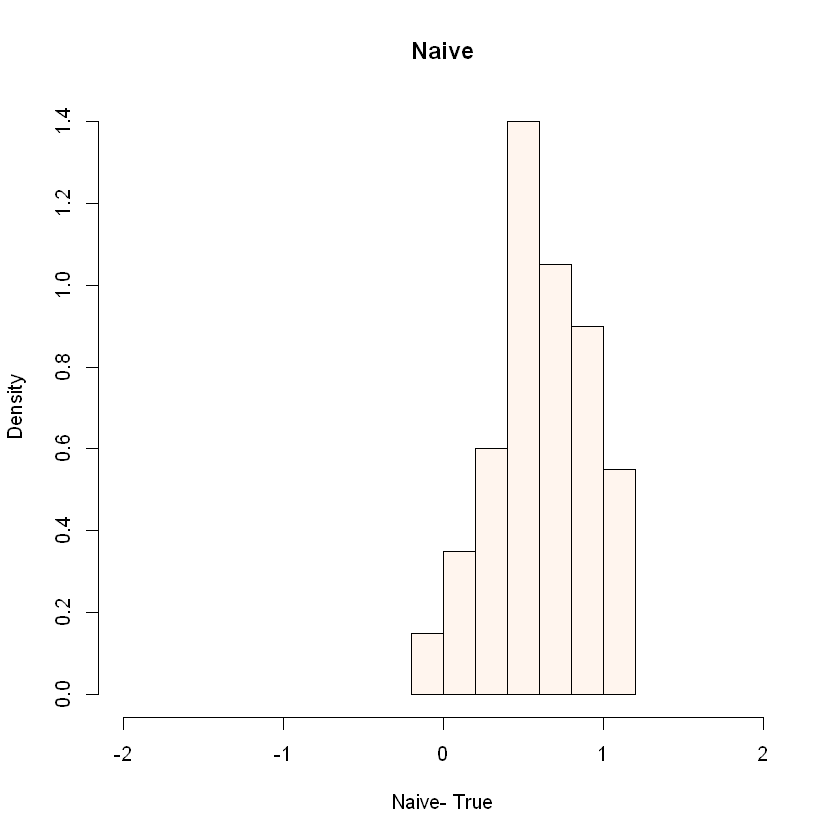

In [21]:
hist(Orthogonal-5,col="seashell1", freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-5, col="seashell1", freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")


## B=1000

In [23]:
library(hdm)

set.seed(1)
B= 1000 # trials 
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y =  Y = 5*D + X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}


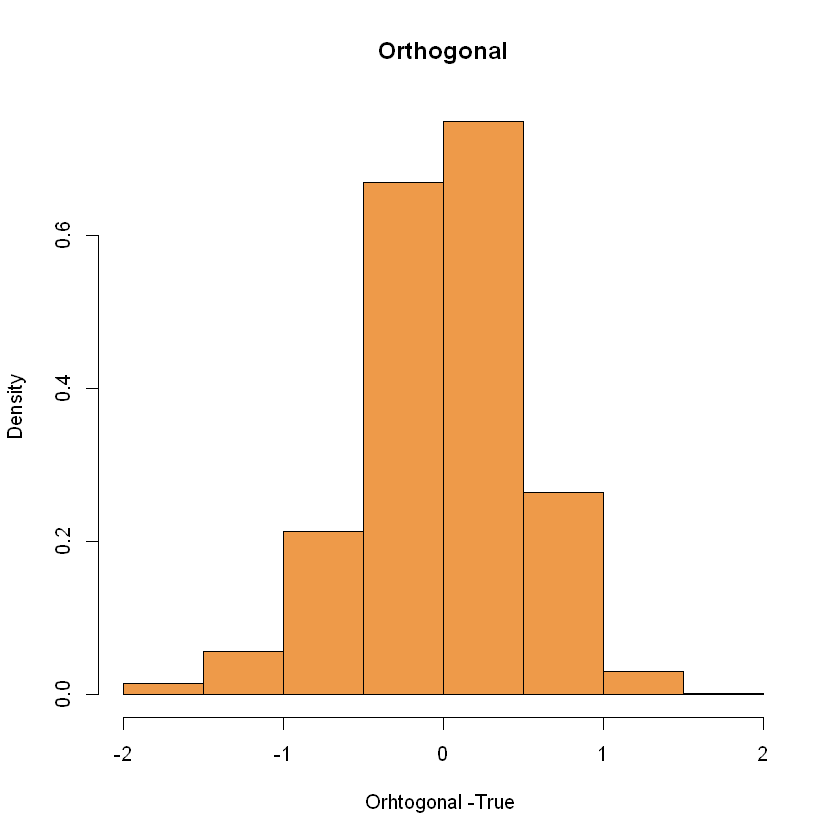

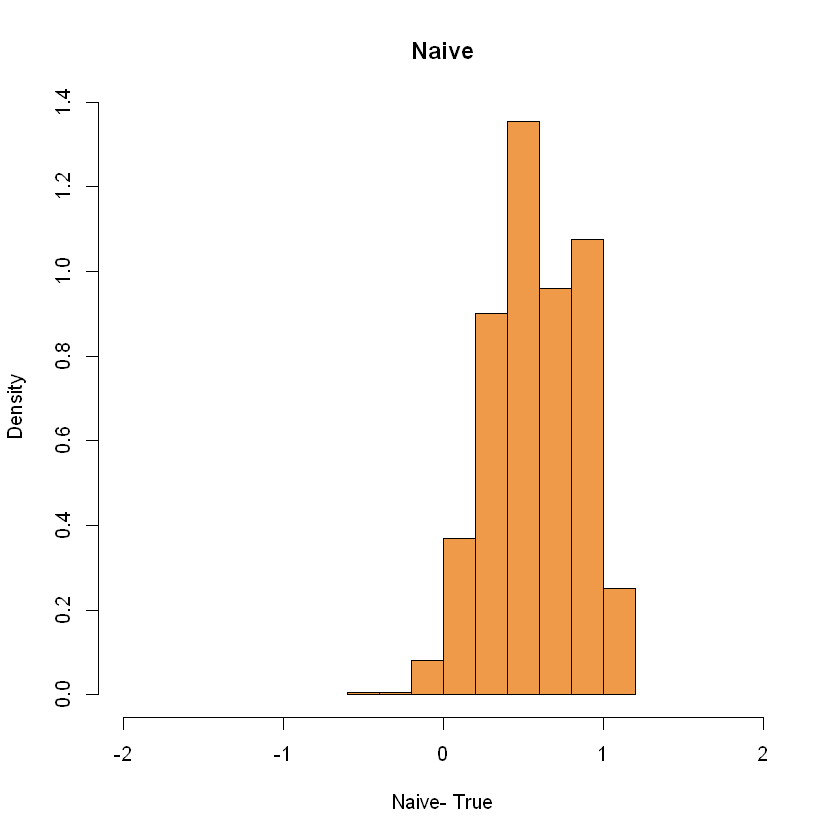

In [25]:
hist(Orthogonal-5,col="tan2", freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-5, col="tan2", freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")



## EXPLANATION 
------
#### - Explain what do you see in the distribution of the histograms. Where the orthogonal and Naive should be centered?
In the orthogonal approach, we can see the distribution converging to 0. In the naive approach the graphic is skewed to the right. As we increase the number of trials, in the orthogonal approach the data looks more like a normal distribution, in the naive the data tend more to the right. 

#### - Why does this happen? Give an econometric explanation of this.
Neyman Orthogonality

$ D = \vartheta_n\alpha(\eta^0) = 0 $ , $\vartheta_nM(\alpha, \eta^0) = 0 $ 

Neyman orthogonality assures us that the value of $ \alpha $ is not sensitive to disturbances in the variables, in other words, that in each trial the value of $ \alpha $ is always close to the real value (in this case 1). This leads to the partial derivatives of alpha with the parameters being equal to 0. The Neyman orthogonality is used to prove the distribution we are using is valid.Orthogonality is obtained when the double lasso is used, this consists of a two-step process in which first we made lasso regressions of $ W $ on $ (Y, D) $ to find the standard error of both variables, in the second step we use the standard error to run a second regression (ols). This guarantee that $ \alpha $ does not change.

In the naive approach this does not happen, the value of $\alpha$ is sensitive to disturbances in the variables, and its value tends to move away from the real value. This method comprises a regression between $ (Y, D) $, in which the number of variables is reduced and then a second regression (ols) of the same variables $ (Y, D) $ is run. This method is valid when it can be ensured that there is randomness in the data, however, this is an unrealistic assumption. 


------
